In [1]:
import pandas as pd

In [2]:
obj = pd.Series([1,2,3,4])

In [3]:
obj

0    1
1    2
2    3
3    4
dtype: int64

In [7]:
obj.name = 'aaa'
obj.index.name = 'bbb'
obj

bbb
0    1
1    2
2    3
3    4
Name: aaa, dtype: int64

In [9]:
dates = pd.date_range('20200504', periods=6)
dates

DatetimeIndex(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-09'],
              dtype='datetime64[ns]', freq='D')

In [11]:
import numpy as np

df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('ABCD'))

In [12]:
df

,A,B,C,D
2020-05-04,0.861235,0.839547,0.391812,0.102564
2020-05-05,0.612786,0.646798,0.894862,0.447677
2020-05-06,0.618663,0.572556,0.323822,0.899059
2020-05-07,0.680184,0.291470,0.876916,0.118504
2020-05-08,0.142323,0.256905,0.699165,0.399497
2020-05-09,0.591603,0.396963,0.422088,0.424796


In [13]:
df.T

,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00
A,0.861235,0.612786,0.618663,0.680184,0.142323,0.591603
B,0.839547,0.646798,0.572556,0.291470,0.256905,0.396963
C,0.391812,0.894862,0.323822,0.876916,0.699165,0.422088
D,0.102564,0.447677,0.899059,0.118504,0.399497,0.424796


In [14]:
df['20200504': '20200506']

,A,B,C,D
2020-05-04,0.861235,0.839547,0.391812,0.102564
2020-05-05,0.612786,0.646798,0.894862,0.447677
2020-05-06,0.618663,0.572556,0.323822,0.899059


In [16]:
df.loc['20200504': '20200506', ['A', 'B']]

,A,B
2020-05-04,0.861235,0.839547
2020-05-05,0.612786,0.646798
2020-05-06,0.618663,0.572556


In [19]:
df.at[dates[0], 'A'], df.loc[dates[0], 'A']

(0.8612350021256382, 0.8612350021256382)

In [20]:
df.head(2)

,A,B,C,D
2020-05-04,0.861235,0.839547,0.391812,0.102564
2020-05-05,0.612786,0.646798,0.894862,0.447677


In [21]:
df.tail(3)

,A,B,C,D
2020-05-07,0.680184,0.291470,0.876916,0.118504
2020-05-08,0.142323,0.256905,0.699165,0.399497
2020-05-09,0.591603,0.396963,0.422088,0.424796


### pandas重新索引  reindex

In [22]:
obj = pd.Series([1,4,2], index=['a', 'b', 'c'])
print(obj)
job_1 =obj.reindex(list('abcdef'))
print(job_1)

a    1
b    4
c    2
dtype: int64
a    1.0
b    4.0
c    2.0
d    NaN
e    NaN
f    NaN
dtype: float64


In [23]:
obj.reindex(list('abcdef'), fill_value=1)

a    1
b    4
c    2
d    1
e    1
f    1
dtype: int64

In [26]:
obj = pd.Series(['a', 'b', 'c'], index=[0, 2, 4])
o1 = obj.reindex(range(6), method='ffill')  # 前项填充（用前一个的值填充当前值）
o2 = obj.reindex(range(6), method='bfill')  # 后项填充（用前一个的值填充当前值）
print(obj)
print(o1)
print(o2)

0    a
2    b
4    c
dtype: object
0    a
1    a
2    b
3    b
4    c
5    c
dtype: object
0      a
1      b
2      b
3      c
4      c
5    NaN
dtype: object


In [33]:
d1 = pd.Series([1.3, 1.5, 2, -3], index=list('abcd'))
d2 = pd.Series([-1, 2, -2, 5.4, -3], index=list('abcde'))

In [34]:
d1 + d2

a    0.3
b    3.5
c    0.0
d    2.4
e    NaN
dtype: float64

In [35]:
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=list('abc'), index=[1,2,3])
print(df1)

   a  b  c
1  0  1  2
2  3  4  5
3  6  7  8


In [36]:
df2 = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=list('cde'), index=[1,2,3,4])
print(df2)

   c   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11


In [37]:
df1 + df2  # 两个位置都有值的位置才会相加

,a,b,c,d,e
1,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,8.0,NaN,NaN
3,NaN,NaN,14.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [39]:
df1.add(df2, fill_value=0)  # fill_value相当于预填充了空值，但对于两个数组中都没有的位置依然为空

,a,b,c,d,e
1,0.0,1.0,2.0,1.0,2.0
2,3.0,4.0,8.0,4.0,5.0
3,6.0,7.0,14.0,7.0,8.0
4,NaN,NaN,9.0,10.0,11.0


In [40]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), columns=list('bde'), index=[1,2,3,4])
series = frame.loc[1]
print(frame)
print(series)

   b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11
b    0
d    1
e    2
Name: 1, dtype: int32


In [42]:
frame - series  # 一直向下广播相减

,b,d,e
1,0,0,0
2,3,3,3
3,6,6,6
4,9,9,9


In [43]:
series = pd.Series(range(3), index=list('bef'))
frame + series  # 相加时并未合并

,b,d,e,f
1,0.0,NaN,3.0,NaN
2,3.0,NaN,6.0,NaN
3,6.0,NaN,9.0,NaN
4,9.0,NaN,12.0,NaN


In [46]:
print(series)
print(frame)

b    0
e    1
f    2
dtype: int64
   b   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11


In [51]:
obj = pd.Series(range(4), index=['a', 'c', 'b', 'd'])

In [52]:
obj.sort_index()

a    0
b    2
c    1
d    3
dtype: int64

In [54]:
obj.sort_values()

a    0
c    1
b    2
d    3
dtype: int64

In [55]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), index=['two', 'one'], columns=list('cdab'))

In [56]:
frame

,c,d,a,b
two,0,1,2,3
one,4,5,6,7


In [57]:
frame.sort_index()

,c,d,a,b
one,4,5,6,7
two,0,1,2,3


In [58]:
frame.sort_index(axis=1)

,a,b,c,d
two,2,3,0,1
one,6,7,4,5


In [60]:
frame = pd.DataFrame({'b': [4, 7, 2, -1], 'a': [0, 4, 2, 0]})
frame

,b,a
0,4,0
1,7,4
2,2,2
3,-1,0


In [61]:
frame.sort_values(by='b')

,b,a
3,-1,0
2,2,2
0,4,0
1,7,4


### 层次化索引

In [62]:
data = pd.Series(np.random.randn(10), index=[list('aaabbbccdd'), [1,2,3,4,5,6,7,8,1,2]])
data

a  1    0.070166
   2   -0.222460
   3    1.072443
b  4    1.115875
   5   -0.738797
   6   -0.232492
c  7    1.235730
   8   -0.390135
d  1   -0.068069
   2    0.428316
dtype: float64

In [63]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3, 4, 5, 6, 7, 8]],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1]])

In [64]:
data['b']

4    1.115875
5   -0.738797
6   -0.232492
dtype: float64

In [68]:
data['b': 'd']

b  4    1.115875
   5   -0.738797
   6   -0.232492
c  7    1.235730
   8   -0.390135
d  1   -0.068069
   2    0.428316
dtype: float64

In [69]:
data['c': 'a']

Series([], dtype: float64)

In [70]:
data[:, 2]

a   -0.222460
d    0.428316
dtype: float64

In [72]:
data.unstack()

,1,2,3,4,5,6,7,8
a,0.070166,-0.222460,1.072443,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,1.115875,-0.738797,-0.232492,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,1.23573,-0.390135
d,-0.068069,0.428316,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data.unstack().stack()

a  1    0.070166
   2   -0.222460
   3    1.072443
b  4    1.115875
   5   -0.738797
   6   -0.232492
c  7    1.235730
   8   -0.390135
d  1   -0.068069
   2    0.428316
dtype: float64

In [76]:
data2 = pd.Series(np.random.randn(10), index=[list('aaabbbccdd'), 
                                              [1,2,3,4,5,6,7,8,1,2],
                                              [4,2,3,4,5,5,7,8,1,2]
                                             ])
data2

a  1  4    0.852686
   2  2    0.366613
   3  3   -1.032535
b  4  4    0.101448
   5  5    1.571442
   6  5    0.990114
c  7  7   -0.299929
   8  8    1.050372
d  1  1    0.719281
   2  2    1.555989
dtype: float64

In [75]:
data2.unstack()

1         2         3         4         5         7         8
a 1      NaN       NaN       NaN -1.859170       NaN       NaN       NaN
  2      NaN  0.459036       NaN       NaN       NaN       NaN       NaN
  3      NaN       NaN -0.970424       NaN       NaN       NaN       NaN
b 4      NaN       NaN       NaN -0.702134       NaN       NaN       NaN
  5      NaN       NaN       NaN       NaN  0.757562       NaN       NaN
  6      NaN       NaN       NaN       NaN  0.480594       NaN       NaN
c 7      NaN       NaN       NaN       NaN       NaN  0.183183       NaN
  8      NaN       NaN       NaN       NaN       NaN       NaN -0.126952
d 1  2.27773       NaN       NaN       NaN       NaN       NaN       NaN
  2      NaN  2.305005       NaN       NaN       NaN       NaN       NaN

In [137]:
frame_data = pd.DataFrame(
    np.arange(15).reshape((5, 3)), index=[
        ['a', 'a','a', 'b', 'b'],
        [1, 2, 1, 1, 2],
    ],
    columns=[['B', 'Y', 'B'], ['G', 'G', 'R']]
)
frame_data

B   Y   B
      G   G   R
a 1   0   1   2
  2   3   4   5
  1   6   7   8
b 1   9  10  11
  2  12  13  14

In [138]:
frame_data.index.names =['key1', 'key2']
frame_data

B   Y   B
            G   G   R
key1 key2            
a    1      0   1   2
     2      3   4   5
     1      6   7   8
b    1      9  10  11
     2     12  13  14

In [139]:
frame_data.columns.names=['color1', 'color2']
frame_data

color1      B   Y   B
color2      G   G   R
key1 key2            
a    1      0   1   2
     2      3   4   5
     1      6   7   8
b    1      9  10  11
     2     12  13  14

### DataFrame层次化索引操作

In [140]:
frame_data['B']

color2      G   R
key1 key2        
a    1      0   2
     2      3   5
     1      6   8
b    1      9  11
     2     12  14

In [141]:
frame_data.loc['a']

color1,B,Y,B
color2,G,G,R
key2,,,
1,0,1,2
2,3,4,5
1,6,7,8


In [142]:
frame_data.loc['a', ['B']]

color1  B   
color2  G  R
key2        
1       0  2
2       3  5
1       6  8

In [154]:
# 使用list时代表在index中查找key1值为'a'或1的，在columns中查找color1值为'B'或'G'的
frame_data.loc[['a', 1],['B', 'G']]

color1     B   
color2     G  R
key1 key2      
a    1     0  2
     2     3  5
     1     6  8

In [155]:
# 使用tuple时代表在index中查找key1值为'a'且key2值为1的，在columns中查找color1值为'B'且color2值为'G'的
# 单列返回Series格式结果
frame_data.loc[('a', 1),('B', 'G')]

key1  key2
a     1       0
      1       6
Name: (B, G), dtype: int32

In [158]:
# 使用tuple时代表在index中查找key1值为'a'且key2值为1的，在columns中查找color1值为'B'且color2值为'G'或'R'的
# 多列或列为list形式返回DataFrame格式结果
frame_data.loc[('a', 1),('B', ['G'])]

color1     B
color2     G
key1 key2   
a    1     0
     1     6

In [144]:
frame_data.sum(level='key2')

color1,B,Y,B
color2,G,G,R
key2,,,
1,15,18,21
2,15,17,19


In [145]:
frame_data.sum(level='color2', axis=1)

color2      G   R
key1 key2        
a    1      1   2
     2      7   5
     1     13   8
b    1     19  11
     2     25  14

### 数据读取

In [172]:
pd.read_csv('./data/data2.csv')  # NA代表空

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world
2,NaN,hi,10,11,12,14
3,1,2,3,4,5,NaN
4,hello,6,7,8,9,world


In [173]:
pd.read_csv('./data/data2.csv', skiprows=[1])  # 不读取哪一行

,a,b,c,d,message,data
0,hello,6,7,8,9,world
1,NaN,hi,10,11,12,14
2,1,2,3,4,5,NaN
3,hello,6,7,8,9,world


In [174]:
data = pd.read_csv('./data/data2.csv')  # NA代表空
pd.isnull(data)

,a,b,c,d,message,data
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,False


In [175]:
# 指定读取，大文件读取
pd.read_csv('./data/data2.csv', nrows=5)  # 读取5行

,a,b,c,d,message,data
0,1,2,3,4,5,NaN
1,hello,6,7,8,9,world
2,NaN,hi,10,11,12,14
3,1,2,3,4,5,NaN
4,hello,6,7,8,9,world


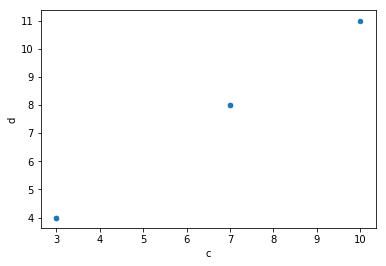

In [178]:
data.plot(x='c', y='d', kind='scatter').get_figure();